# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [2]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    l = 0
    for i in range(len(X)):
        squared_difference = (Y[i] - np.dot(w, X[i])) ** 2
        l += squared_difference
    return l
    
    pass

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    g = -2 * (y - (np.dot(w, x))) * x
    return g   
    
    pass

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    losses = []
    current_weight = w_start
    for i in range(N_epochs):
        np.random.permutation(X)
        losses.append(loss(X, Y, current_weight))
        for j in range(len(X)):
            current_weight = current_weight - (eta * gradient(X[j], Y[j], current_weight))
    w = current_weight
    return w, losses    
    
    pass

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in sgd_data.csv and run SGD using the given parameters; print out the final weights.

In [4]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

data = load_data("sgd_data.csv")

X = []
Y = []
for i in range(len(data)):
    x = data[i][:4]
    new_x = np.insert(x, 0, 1)
    X.append(new_x)
    Y.append(data[i][4])
    
eta = np.exp(-15) 
b = 0.001
w = [b, 0.001, 0.001, 0.001, 0.001] 
N_epochs = 800

weights, losses = SGD(X, Y, w, eta, N_epochs)

print(weights)

[ -0.22720591  -5.94229011   3.94369494 -11.72402388   8.78549375]


## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

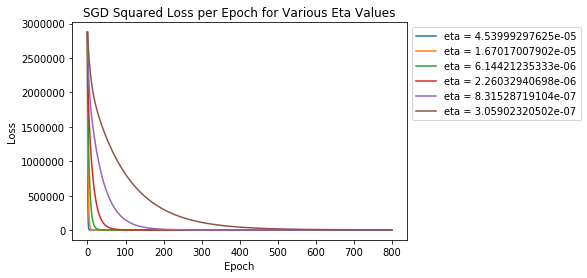

In [5]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================

eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
w_start = [0.001, 0.001, 0.001, 0.001, 0.001] 
N_epochs = 800

legend_handles = []
series_names = []

plt.close('all')
plt.figure()

for eta in eta_vals:
    _, losses = SGD(X, Y, w_start, eta, N_epochs)
    name = 'eta = ' + str(eta)
    data_series, = plt.plot(losses, label=name)
    legend_handles.append(data_series)
    series_names.append(name)

plt.legend(legend_handles, series_names, loc = "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD Squared Loss per Epoch for Various Eta Values')
plt.show()

## Problem 4H

Provide your code for computing the least-squares analytical solution below.

In [6]:
from numpy.linalg import inv

X_transpose = np.transpose(X)
product = np.dot(X_transpose, X)
inverse = np.linalg.inv(product)
w = np.dot(np.dot(inverse, X_transpose), Y)

print(w)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
